## Importing Libraries

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image Preprocessing

In [11]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical", #for main program change it to categorical
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 5471 files belonging to 5 classes.


### Validation Image Preprocessing

In [12]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical", #for main program change it to categorical
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 3896 files belonging to 5 classes.


### Building Model

In [8]:
# from tensorflow.keras.layers import Dense,Conv2D, MaxPool2D, Flatten, Dropout
# from tensorflow.keras.models import Sequential

In [13]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

# Load the InceptionV3 base model, without the top layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model (optional, for transfer learning)
base_model.trainable = False

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(5, activation='softmax')(x)  # Assuming 5 output classes

# Construct the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_94 (Conv2D)  │ (None, 63, 63,    │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 63, 63,    │         96 │ conv2d_94[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, 63, 63,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_95 (Conv2D)  │ (None, 61, 61,    │      9,216 │ activation_94[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 61, 61,    │         96 │ conv2d_95[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, 61, 61,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_96 (Conv2D)  │ (None, 61, 61,    │     18,432 │ activation_95[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 61, 61,    │        192 │ conv2d_96[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, 61, 61,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 30, 30,    │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_97 (Conv2D)  │ (None, 30, 30,    │      5,120 │ max_pooling2d_4[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 30, 30,    │        240 │ conv2d_97[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, 30, 30,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_98 (Conv2D)  │ (None, 28, 28,    │    138,240 │ activation_97[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        576 │ conv2d_98[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, 28, 28,    │          0 │ batch_normalizat

 Total params: 23,906,085 (91.19 MB)

 Trainable params: 2,103,301 (8.02 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [5]:
# model = Sequential()

In [ ]:
## Building Convolution Layer
# model.add(Conv2D(filters = 32, kernel_size = 3, padding='same',activation='relu',input_shape=[128,128,3]))
# model.add(Conv2D(filters = 32, kernel_size = 3, activation='relu'))
# model.add(MaxPool2D(pool_size=2, strides=2))

In [7]:
# model.add(Conv2D(filters = 64, kernel_size = 3, padding='same',activation='relu',input_shape=[128,128,3]))
# model.add(Conv2D(filters = 64, kernel_size = 3, activation='relu'))
# model.add(MaxPool2D(pool_size=2, strides=2))

In [8]:
# model.add(Conv2D(filters = 128, kernel_size = 3, padding='same',activation='relu',input_shape=[128,128,3]))
# model.add(Conv2D(filters = 128, kernel_size = 3, activation='relu'))
# model.add(MaxPool2D(pool_size=2, strides=2))

In [9]:
# model.add(Conv2D(filters = 256, kernel_size = 3, padding='same',activation='relu',input_shape=[128,128,3]))
# model.add(Conv2D(filters = 256, kernel_size = 3, activation='relu'))
# model.add(MaxPool2D(pool_size=2, strides=2))

In [10]:
# model.add(Conv2D(filters = 512, kernel_size = 3, padding='same',activation='relu',input_shape=[128,128,3]))
# model.add(Conv2D(filters = 512, kernel_size = 3, activation='relu'))
# model.add(MaxPool2D(pool_size=2, strides=2))

In [14]:
# model.add(Dropout(0.5))

In [15]:
# model.add(Flatten())

In [13]:
# model.add(Dense(units=5000, activation='relu'))

In [16]:
# model.add(Dropout(0.5))

In [17]:
# #Output Layer
# model.add(Dense(units=5, activation='softmax'))

### Compiling Model

In [ ]:
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss = 'categorical_crossentropy', metrics=['accuracy'])
# model.summary() #loss = 'categorical_crossentropy / mean_absolute_percentage_error'

### Model Training

In [14]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=25)

Epoch 1/25
342/342 ━━━━━━━━━━━━━━━━━━━━ 302s 830ms/step - accuracy: 0.4793 - loss: 42.2461 - val_accuracy: 0.7277 - val_loss: 4.1153
Epoch 2/25
342/342 ━━━━━━━━━━━━━━━━━━━━ 266s 780ms/step - accuracy: 0.6919 - loss: 4.2821 - val_accuracy: 0.7562 - val_loss: 1.3354
Epoch 3/25
342/342 ━━━━━━━━━━━━━━━━━━━━ 262s 766ms/step - accuracy: 0.7190 - loss: 1.3476 - val_accuracy: 0.7510 - val_loss: 0.9209
Epoch 4/25
342/342 ━━━━━━━━━━━━━━━━━━━━ 251s 734ms/step - accuracy: 0.7181 - loss: 0.9720 - val_accuracy: 0.7487 - val_loss: 0.8595
Epoch 5/25
342/342 ━━━━━━━━━━━━━━━━━━━━ 243s 710ms/step - accuracy: 0.7398 - loss: 0.7924 - val_accuracy: 0.7880 - val_loss: 0.7240
Epoch 6/25
342/342 ━━━━━━━━━━━━━━━━━━━━ 251s 734ms/step - accuracy: 0.7586 - loss: 0.7374 - val_accuracy: 0.7562 - val_loss: 0.8058
Epoch 7/25
342/342 ━━━━━━━━━━━━━━━━━━━━ 247s 725ms/step - accuracy: 0.7569 - loss: 0.7193 - val_accuracy: 0.7772 - val_loss: 0.7255
Epoch 8/25
342/342 ━━━━━━━━━━━━━━━━━━━━ 249s 730ms/step - accuracy: 0.7632 

### Model Evaluation

In [15]:
#training
train_loss, train_acc = model.evaluate(training_set)

342/342 ━━━━━━━━━━━━━━━━━━━━ 141s 411ms/step - accuracy: 0.9015 - loss: 0.2862


In [16]:
#validation
val_loss, val_acc = model.evaluate(validation_set)

244/244 ━━━━━━━━━━━━━━━━━━━━ 97s 397ms/step - accuracy: 0.8240 - loss: 0.5159


### Saving Model

In [17]:
model.save("trained_model1.keras")

In [18]:
training_history.history

{'accuracy': [0.5713763236999512,
  0.6998720765113831,
  0.7179674506187439,
  0.7236337065696716,
  0.7488576173782349,
  0.7603728771209717,
  0.7576311230659485,
  0.7645768523216248,
  0.7724364995956421,
  0.7802960872650146,
  0.7728020548820496,
  0.7925425171852112,
  0.7991226315498352,
  0.7980259656906128,
  0.8067994713783264,
  0.8115518093109131,
  0.8148418664932251,
  0.8166697025299072,
  0.8161213397979736,
  0.8205081224441528,
  0.8252604603767395,
  0.8274538516998291,
  0.838238000869751,
  0.8303783535957336,
  0.8336684107780457],
 'loss': [24.225269317626953,
  3.1909186840057373,
  1.2127565145492554,
  0.9257416129112244,
  0.7654705047607422,
  0.7296649813652039,
  0.7061251997947693,
  0.6793972849845886,
  0.6547801494598389,
  0.6032312512397766,
  0.6342383623123169,
  0.5952686667442322,
  0.5613787770271301,
  0.5506339073181152,
  0.5226737856864929,
  0.5216405391693115,
  0.5215798020362854,
  0.48929667472839355,
  0.503854513168335,
  0.47941625

In [19]:
#Recording History
import json
with open("training_hist.json", "w") as f:
    json.dump(training_history.history,f)

### Accuracy Visualization

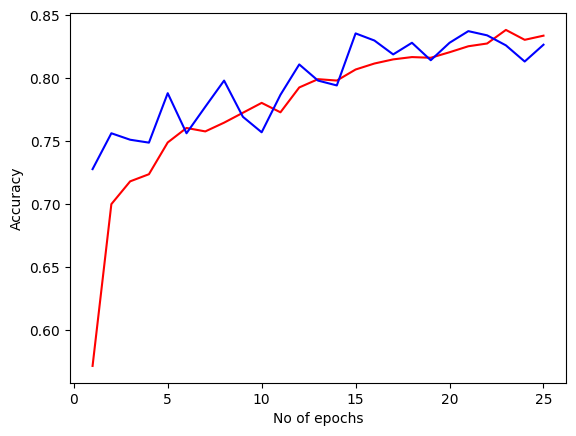

In [20]:
epochs = [i for i in range(1,26)]
plt.plot(epochs,training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel("No of epochs")
plt.ylabel("Accuracy")
plt.show()

### Some Other Metrices

In [21]:
class_name = validation_set.class_names
class_name

['Azadirachta_indica',
 'Justicia_adhatoda',
 'Mentha_arvensis',
 'Moringa_oleifera',
 'Weed']

In [22]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical", #for main program change it to categorical
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 799 files belonging to 5 classes.


In [23]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

50/50 ━━━━━━━━━━━━━━━━━━━━ 26s 467ms/step


(array([[9.5450848e-01, 4.6681506e-03, 2.8507957e-02, 2.9780380e-03,
         9.3374271e-03],
        [9.9602509e-01, 1.6405700e-03, 2.3182037e-03, 1.2769219e-05,
         3.3516224e-06],
        [9.9742681e-01, 3.5100197e-04, 9.9644554e-04, 1.3595552e-08,
         1.2257752e-03],
        ...,
        [2.7724011e-03, 5.5519322e-09, 5.5661764e-07, 8.4861043e-05,
         9.9714214e-01],
        [4.3665290e-02, 6.3648775e-05, 2.0328951e-06, 7.9322257e-05,
         9.5618969e-01],
        [3.1153432e-01, 6.3836174e-05, 1.3156303e-03, 3.1416051e-04,
         6.8677205e-01]], dtype=float32),
 (799, 5))

In [24]:
predicted_categories = tf.argmax(y_pred, axis = 1) #axis = 1 horizontally(row wise)
predicted_categories

<tf.Tensor: shape=(799,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 0, 0, 0, 2, 0, 0, 2, 0, 3, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       4, 1, 0, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
     

In [25]:
true_categories = tf.concat([y for x,y in test_set], axis = 0)  #axis = 0 vertically(column wise)
true_categories

<tf.Tensor: shape=(799, 5), dtype=float32, numpy=
array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)>

In [26]:
y_true = tf.argmax(true_categories, axis = 1)
y_true

<tf.Tensor: shape=(799,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     

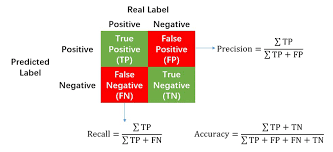

In [27]:
%pip install scikit-learn
from sklearn.metrics import classification_report,confusion_matrix

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 493.7 kB/s eta 0:00:22
   - -------------------------------------- 0.5/11.1 MB 493.7 kB/s eta 0:00:22
   -- ------------------------------------- 0.8/11.1 MB 516.5 kB/s eta 0:00:20
   -- ------------------------------------- 0.8/11.1 MB 516.5 kB/s eta 0:00:20
   --- ------------------------------------ 1.0/11.1 MB 519.1 

In [28]:
print(classification_report(y_true, predicted_categories, target_names=class_name))

                    precision    recall  f1-score   support

Azadirachta_indica       0.74      0.86      0.80       198
 Justicia_adhatoda       0.92      0.86      0.89       161
   Mentha_arvensis       0.90      0.85      0.87       150
  Moringa_oleifera       0.89      0.78      0.83       153
              Weed       0.83      0.85      0.84       137

          accuracy                           0.84       799
         macro avg       0.86      0.84      0.85       799
      weighted avg       0.85      0.84      0.84       799



In [29]:
cm = confusion_matrix(y_true, predicted_categories)
cm, cm.shape

(array([[171,   3,   6,  13,   5],
        [  7, 139,   1,   1,  13],
        [ 14,   7, 128,   1,   0],
        [ 21,   2,   5, 120,   5],
        [ 18,   0,   3,   0, 116]]),
 (5, 5))

### Confusion Matrix Visualization

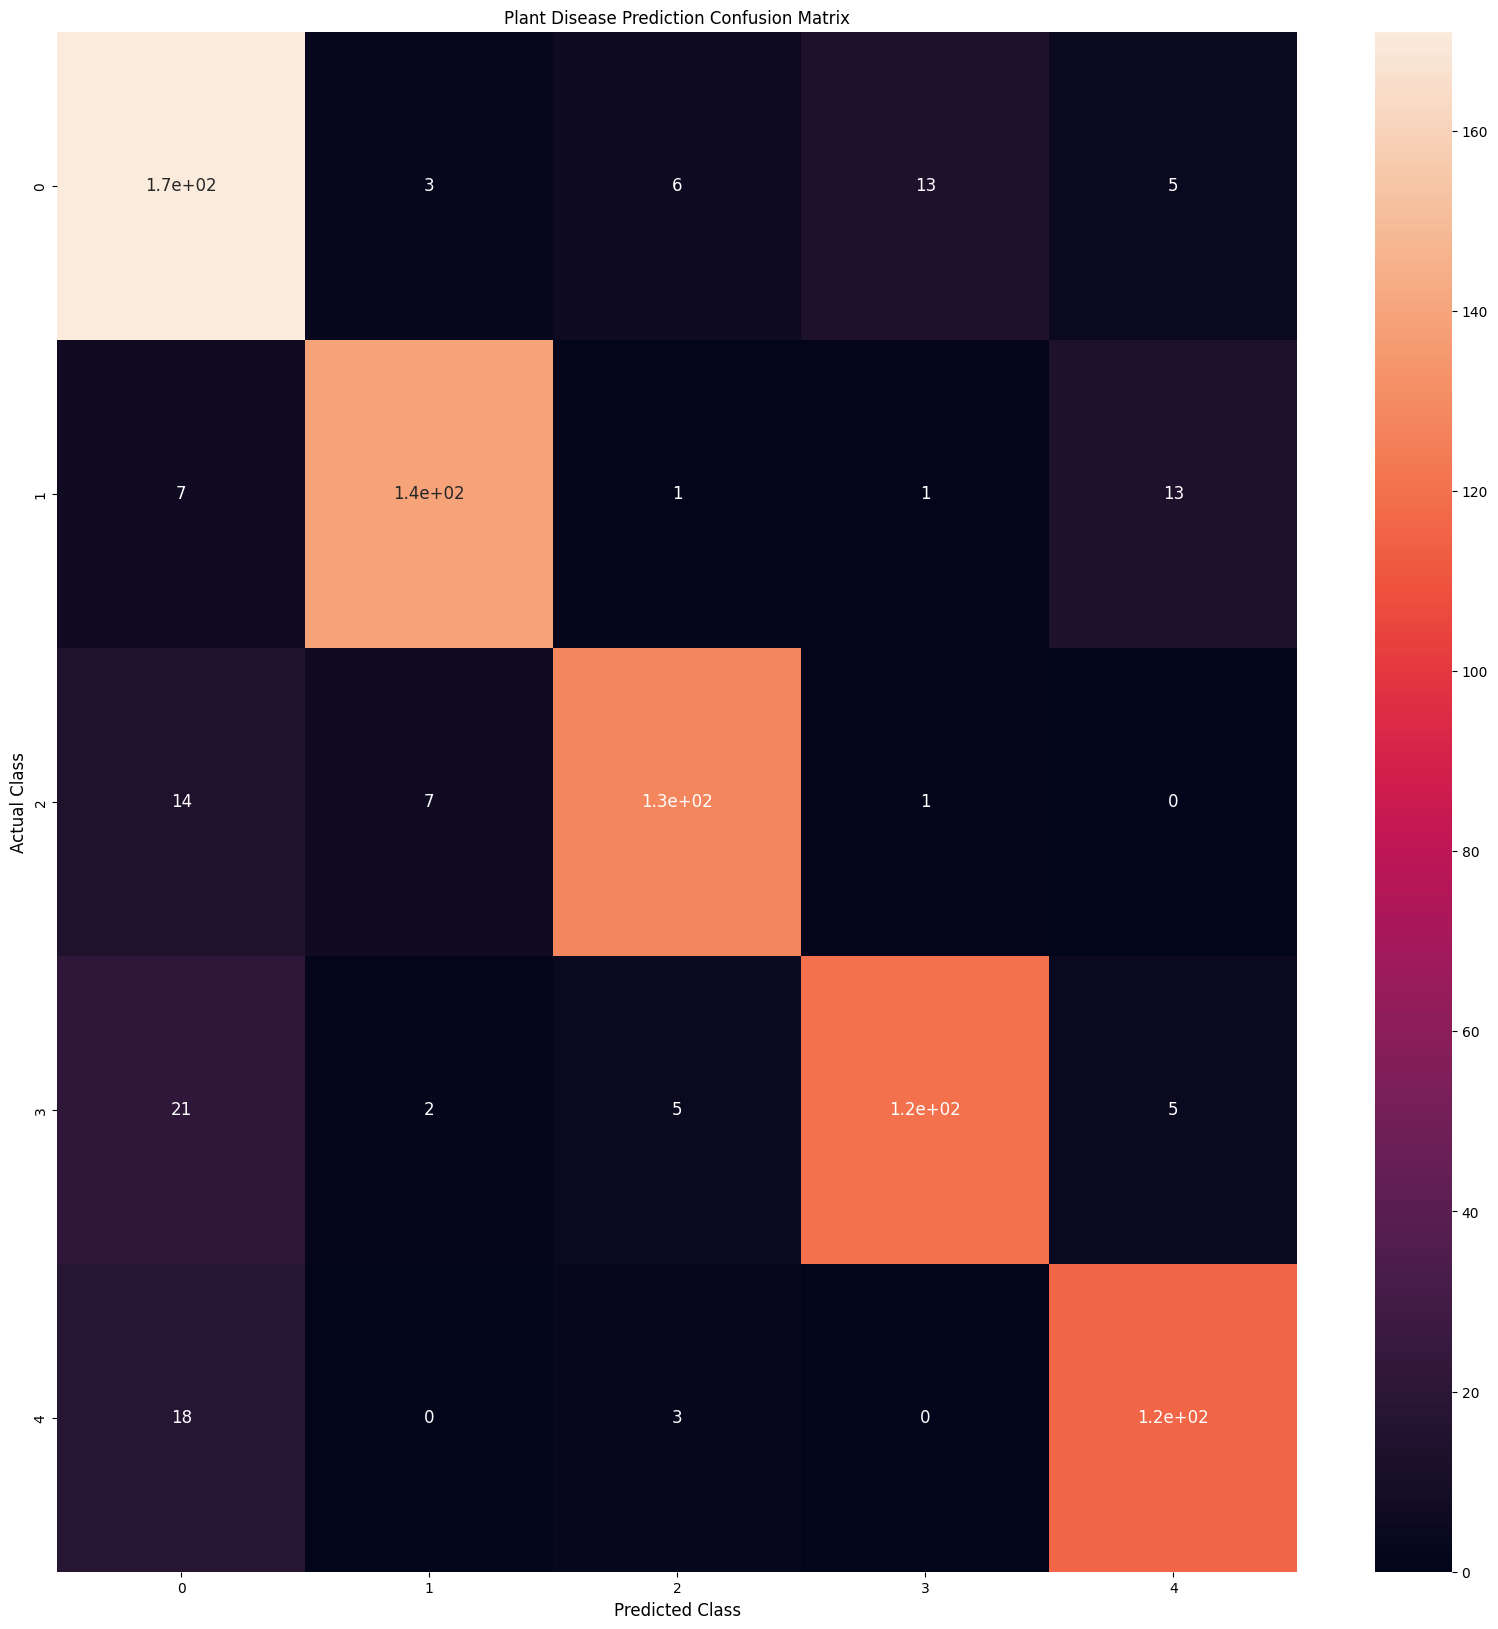

In [30]:
plt.figure(figsize=(20,20))
sns.heatmap(cm, annot=True, annot_kws={'size':12})
plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("Actual Class", fontsize = 12)
plt.title("Plant Disease Prediction Confusion Matrix", fontsize = 12)
plt.show()